<a href="https://colab.research.google.com/github/pratik25042000/telecom-churn-analysis/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [ ]:
# Mount a drive for accesing a dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing libraries which are used in analysing the dataset
import numpy as np  # Used for linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Importing Libraries which are used to visualize the output data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Importing a Dataset by Creating DataFrame(df) of given Dataset 
path = "/content/drive/MyDrive/capstone project 1/Telecom Churn.csv"
df = pd.read_csv(path)

# Exploratory Data Analysis:

In [ ]:
df.head() # To fetch first 5 results(rows) for the DataFrame

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.tail() # To fetch last 5 results(rows) for the DataFrame

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
print(df.shape) # To print shape(No of Columns & No of Rows) of DataFrame

(3333, 20)


In [ ]:
#Create function to give overciew of training Dataset
def dataoveriew(df, message):
    print(f'{message}:\n')
    print("* Rows:", df.shape[0])
    print("\n* Number of features:", df.shape[1])
    print("\n* Features/Columns:")
    print(df.columns)
    print("\n* Unique values:")
    print(df.nunique())

In [ ]:
dataoveriew(df, 'Overiew of the training dataset') #Calling the dataoverview function by passing dataframe and message

Overiew of the training dataset:

* Rows: 3333

* Number of features: 20

* Features/Columns:
Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

* Unique values:
State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls      

In [ ]:
print(df.info())  #print a concise summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

## Variable Breakdown:
**STATE:** *51 Unique States in United States of America*

**Account Length:** *Length of The Account*

**Area Code:** *415 relates to San Francisco,408 is of San Jose and 510 is of City of Okland*

**International Plan:** *Yes Indicate International Plan is Present and No Indicates no subscription for Internatinal Plan*

**Voice Mail Plan:** *Yes Indicates Voice Mail Plan is Present and No Indicates no subscription for Voice Mail Plan*

**Number vmail messages:** *Number of Voice Mail Messages ranging from 0 to 50*

**Total day minutes:** *Total Number of Minutes Spent By Customers in Morning*

**Total day calls:** *Total Number of Calls made by Customer in Morning.*

**Total day charge:** *Total Charge to the Customers in Morning.*

**Total eve minutes:** *Total Number of Minutes Spent By Customers in Evening*

**Total eve calls:** *Total Number of Calls made by Customer in Evening.*

**Total eve charge:** *Total Charge to the Customers in Morning.*

**Total night minutes:** *Total Number of Minutes Spent By Customers in the Night.*

**Total night calls:** *Total Number of Calls made by Customer in Night.*

**Total night charge:** *Total Charge to the Customers in Night.*

**Total intl minutes:** *Total Number of Minutes Spent By Customers Internationally.*

**Total intl calls:** *Total Number of Calls made by Customer Internationally.*

**Total intl charge:** *Total Charge to the Customers on International calls.*

**Customer service calls:** *Total number of Customer service calls.*  

**Churn:** *True means customer churned and False means customer not churned*

In [ ]:
print(df.describe())  #Used to Generate descriptive statistics of DataFrame

       Account length    Area code  ...        Churn  Total Calls
count     3333.000000  3333.000000  ...  3333.000000  3333.000000
mean       101.064806   437.182418  ...     0.144914   305.137114
std         39.822106    42.371290  ...     0.352067    34.448164
min          1.000000   408.000000  ...     0.000000   191.000000
25%         74.000000   408.000000  ...     0.000000   282.000000
50%        101.000000   415.000000  ...     0.000000   305.000000
75%        127.000000   510.000000  ...     0.000000   328.000000
max        243.000000   510.000000  ...     1.000000   416.000000

[8 rows x 20 columns]


We can change the column type with the astype method. Let's apply this method to the Churn feature to convert it into int64:

In [ ]:
df['Churn'] = df['Churn'].astype('int64')
df['Churn'].dtype

dtype('int64')

Calculate Dependent and Independent Variables

In [ ]:
# x is dependend variable
x = df.iloc[:, 3:-1]

# y is independent variable
y = df.iloc[:, :3]

print(f"The Dependent variables are: \n{x} \n\n\n")
print(f"The Independent variables are: \n{y}")

The Dependent variables are: 
     International plan  ... Customer service calls
0                    No  ...                      1
1                    No  ...                      1
2                    No  ...                      0
3                   Yes  ...                      2
4                   Yes  ...                      3
...                 ...  ...                    ...
3328                 No  ...                      2
3329                 No  ...                      3
3330                 No  ...                      2
3331                Yes  ...                      2
3332                 No  ...                      0

[3333 rows x 16 columns] 



The Independent variables are: 
     State  Account length  Area code
0       KS             128        415
1       OH             107        415
2       NJ             137        415
3       OH              84        408
4       OK              75        415
...    ...             ...        ...
3328    AZ        

In [ ]:
dependent_variables = ["International plan", "Voice mail plan","Number vmail messages", "Total day minutes", "Total day calls", "Total day charge", "Total eve minutes", "Total eve calls", "Total eve charge", "Total night minutes", "Total night calls", "Total night charge", "Total intl minutes", "Total intl calls", "Total intl charge", "Customer service calls"]
independent_variables = ["State", "Area code","Account length"]

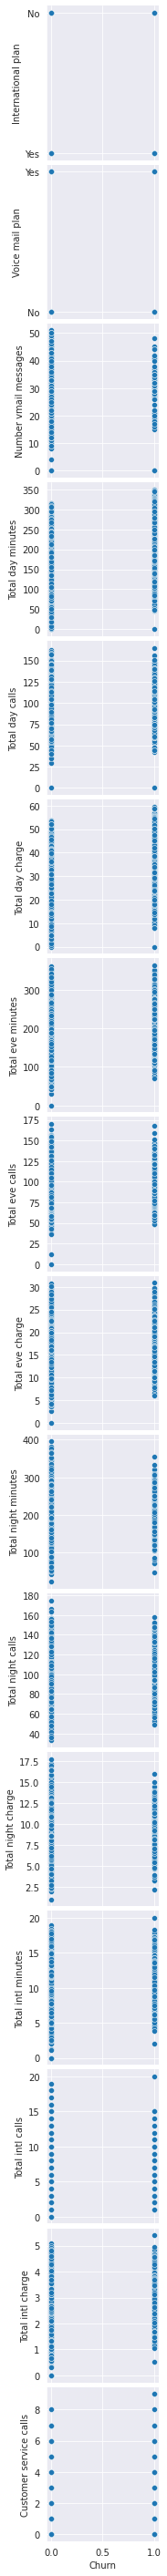

In [ ]:
sns.pairplot(data=df,
                  x_vars= 'Churn',
                  y_vars=dependent_variables)

### Looking for and handling NaN/ Null/ Missing Values

In [ ]:
df == np.nan # Check wheather any null values present in DataFrame or not

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3329,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3330,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3331,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
print(df.isnull().sum()) # It gives count of null values from each columns of a DataFrame

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


In [ ]:
print("Missing values:", df.isnull().sum().values.sum())

Missing values: 0


There id no null/NaN/missing values present in the Dataset

### **NOTE:**
    Suppose any of the column containg the null/NaN/missing values; we can,
        1. Checking for missing values using isnull() and notnull()
        2. Filling missing values using fillna(), replace() and interpolate()
        3. Dropping missing values using dropna()

In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the include parameter.

In [ ]:
df.describe(include=['object', 'bool']) #Used to Generate descriptive statistics of DataFrame which only includes datatypes object and bool

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


Some bit of manual sorting has to be done here as certain categories are actually represented by numbers like "Area code"

In [ ]:
df['State'].nunique()

51

there are 51 state in which the users are present

In [ ]:
df['State'].value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OR     78
OH     78
VA     77
WY     77
CT     74
VT     73
MI     73
ID     73
TX     72
UT     72
IN     71
KS     70
MD     70
NJ     68
NC     68
MT     68
WA     66
CO     66
NV     66
MA     65
RI     65
MS     65
AZ     64
MO     63
FL     63
ME     62
ND     62
NM     62
DE     61
NE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

these are the values of user per state

In [ ]:
per=(df['Churn'].sum()) *100/df.shape[0]
print('The percentage of customers churning from the company is: %{}'.format(per) )

The percentage of customers churning from the company is: %14.491449144914492


Text(0.5, 1.0, 'churn users with respect to state')

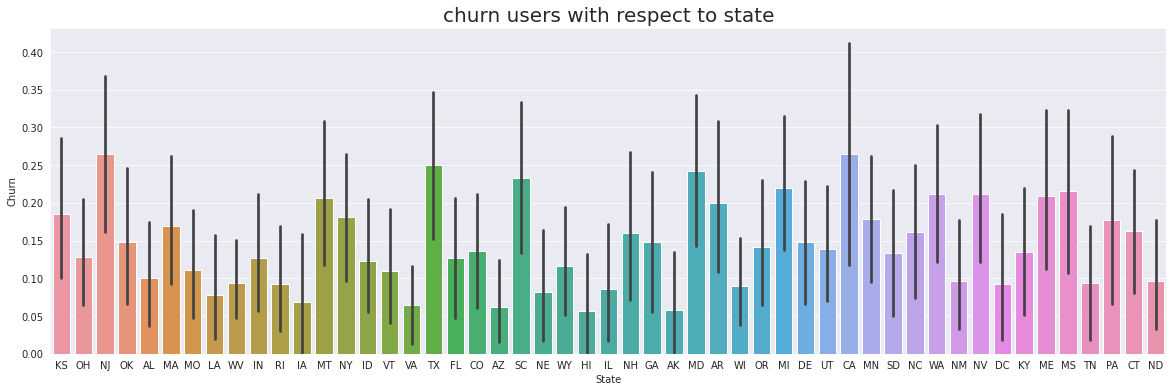

In [ ]:
plt.figure(figsize=(20,6))
sns.set_style('darkgrid')
sns.barplot(data=df,x='State',y='Churn')
plt.title('churn users with respect to state', fontsize = 20)

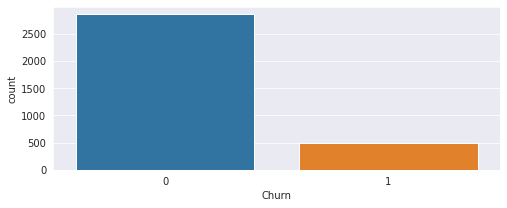

In [ ]:
plt.figure(figsize = (8,3))
sns.countplot(data = df, x = 'Churn')
plt.show()

By this graphh it is clear that, Most people do not leave the service

In [ ]:
df["Churn"][15:30]  #Churn values between 15 and 30 using slicing

15    1
16    0
17    0
18    0
19    0
20    0
21    1
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
Name: Churn, dtype: int64

In [ ]:
num=df['Churn'].value_counts()  #It give us count of churned(1) customers and non-chruned(0) customers
per=(df['Churn'].value_counts(normalize=True))*100
print(num)
print(per)

0    2850
1     483
Name: Churn, dtype: int64
0    85.508551
1    14.491449
Name: Churn, dtype: float64


2850 (85.50%)users out of 3333 are loyal; their Churn value is 0. To calculate fractions, pass normalize=True to the value_counts function.

In [ ]:
numeric_columns = ["Account length", "Number vmail messages", "Total day minutes", "Total day calls", "Total day charge", "Total eve minutes", "Total eve calls", "Total eve charge", "Total night minutes", "Total night calls", "Total night charge", "Total intl minutes", "Total intl calls", "Total intl charge", "Customer service calls","Churn"]
categorical_columns = ["State", "Area code", "International plan", "Voice mail plan"]
target = ["Churn"]

numeric_df = df[numeric_columns]
categorical_df = df[categorical_columns]

target_df = df[target]

For categorical (type object) and boolean (type bool) features we can use the value_counts method. Let's have a look at the distribution of Churn:

In [ ]:
# Just making sure we split the columns correctly
len(numeric_columns) + len(categorical_columns)

20

###Correlation of numeric variables

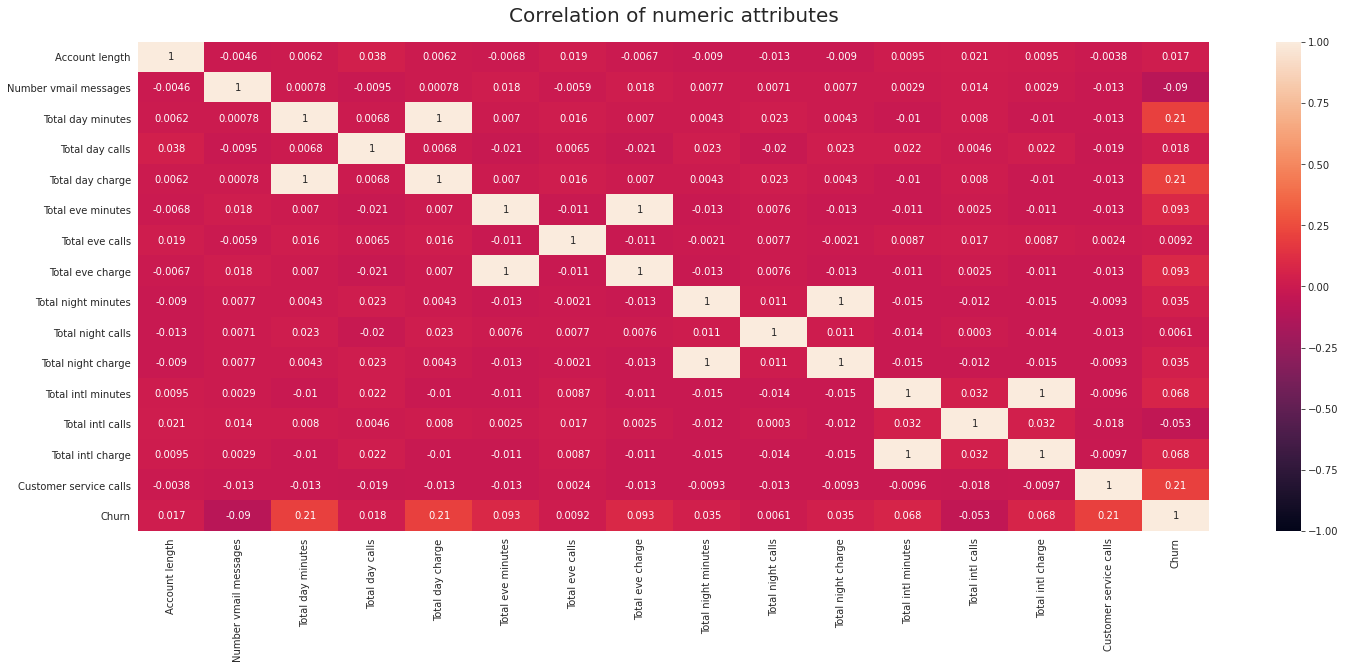

In [ ]:
plt.figure(figsize=(24, 9)) 
heatmap = sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, annot=True) # Using seaborn library we plot heatmap
heatmap.set_title('Correlation of numeric attributes', fontdict={'fontsize':20}, pad=20); # Giving title to the heatmap

The above heatmap shows how the numeric variables are correlated with each other.

In [ ]:
# As we know that International plan and Voice mail plan are categorical columns convert it into numeric columns
dict1 = {"No":0,"Yes":1}
df["International plan"] = df["International plan"].map(dict1)
df["Voice mail plan"]  = df["Voice mail plan"].map(dict1)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [ ]:
# Calculate mean of Total day calls when churn == 0 and International plan == 0
df[(df["Churn"]==0 & (df["International plan"]==0))]["Total day calls"].mean()

100.28315789473685

In [ ]:
# Calculate mean of Total intl minutes when churn == 0 and International plan == 0
df[(df["Churn"]==0 & (df["International plan"]==0))]["Total intl minutes"].mean()

10.158877192982445

In [ ]:
df.apply(np.max)  # It shows Maximum value of each column in the DataFrame

State                        WY
Account length              243
Area code                   510
International plan            1
Voice mail plan               1
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes         395
Total night calls           175
Total night charge        17.77
Total intl minutes           20
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

### EDA using Visualization:

starts with some basic Visualizations:

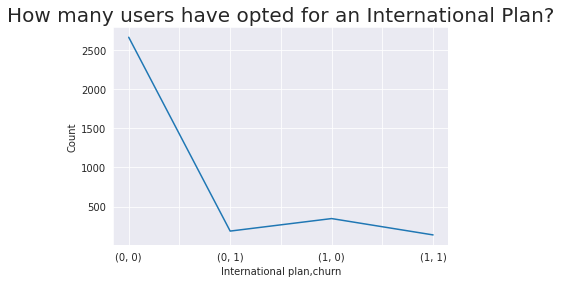

In [ ]:
churn_intl = df.groupby(['Churn','International plan']).size()
churn_intl.plot()
plt.xlabel('International plan,churn', fontsize = 10)
plt.title('How many users have opted for an International Plan?', fontsize = 20)
plt.ylabel('Count', fontsize = 10)
plt.show()

We can see that not many users opt for International plans.

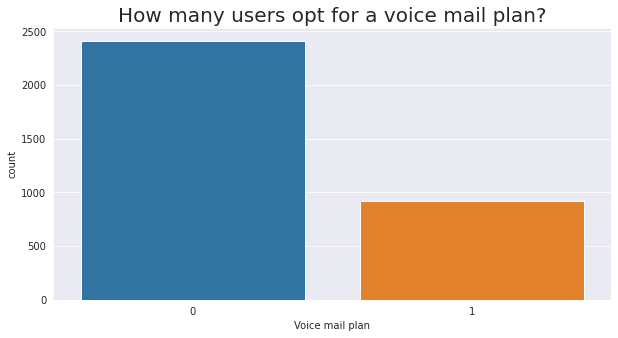

In [ ]:
# No. of users opted for Voice mail plan
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'Voice mail plan')
plt.xlabel('Voice mail plan', fontsize = 10)
plt.title('How many users opt for a voice mail plan?', fontsize = 20)
plt.show()

we can see that Many users do not opt for a voice mail plan

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


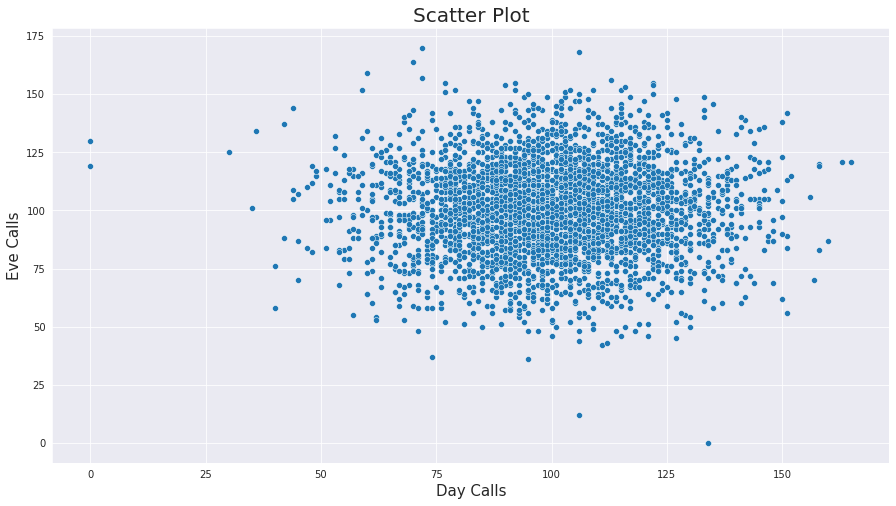

In [ ]:
# Plot a Scatterplot using seaborn library
plt.rcParams["figure.figsize"] = (15,8)
sns.scatterplot(df["Total day calls"],df["Total eve calls"],palette = "dark")
plt.title("Scatter Plot",fontsize=20)
plt.xlabel("Day Calls",fontsize=15)
plt.ylabel("Eve Calls",fontsize=15)
plt.show()

Let's see how churn rate is related to the International plan feature. We'll do this using a crosstab contingency table and also through visual analysis with Seaborn

In [ ]:
pd.crosstab(df['Churn'], df['International plan'], margins=True)

International plan,0,1,All
Churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


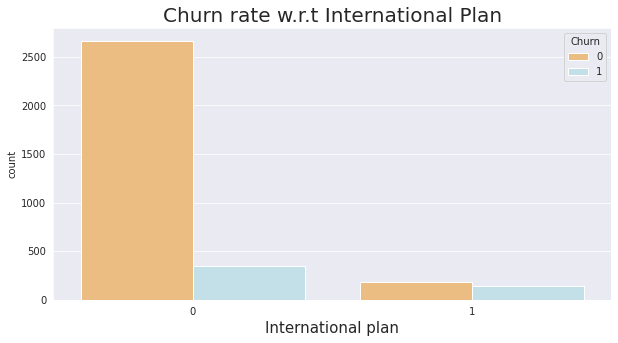

In [ ]:
# Countplot of churn rate w.r.t International Plan
plt.rcParams["figure.figsize"] = (10,5)
sns.countplot(df["International plan"],hue = df["Churn"],palette = "RdYlBu")
plt.title("Churn rate w.r.t International Plan",fontsize=20)
plt.xlabel("International plan",fontsize=15)
plt.show()

In [ ]:
pd.crosstab(df['Churn'], df['Voice mail plan'], margins=True)

Voice mail plan,0,1,All
Churn,,,
0,2008,842,2850
1,403,80,483
All,2411,922,3333


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


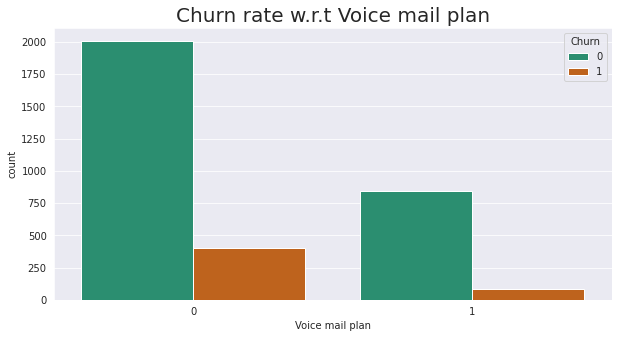

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
sns.countplot(df["Voice mail plan"],hue = df["Churn"],palette = "Dark2")
plt.title("Churn rate w.r.t Voice mail plan",fontsize=20)
plt.xlabel("Voice mail plan",fontsize=10)
plt.show()

We see that, with International Plan, the churn rate is much higher, which is an interesting observation! Perhaps large and poorly controlled expenses with international calls are very conflict-prone and lead to dissatisfaction among the telecom operator's customers.

Next, let's look at another important feature – Customer service calls. Let's also make a summary table and a picture.

In [ ]:
pd.crosstab(df['Churn'], df['Customer service calls'], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


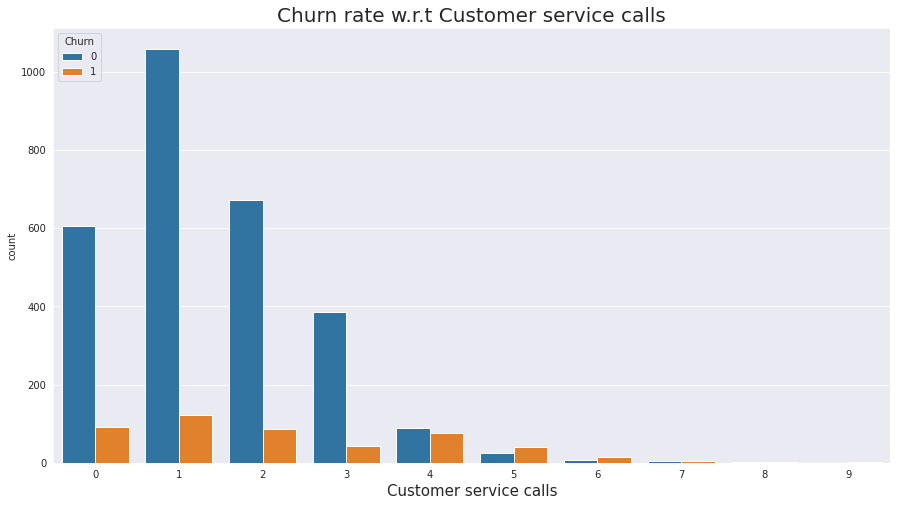

In [ ]:
# Countplot of churn rate w.r.t Customer service calls
plt.rcParams["figure.figsize"] = (15,8)
sns.countplot(x='Customer service calls', hue='Churn', data=df);
plt.title("Churn rate w.r.t Customer service calls",fontsize=20)
plt.xlabel("Customer service calls",fontsize=15)
plt.show()

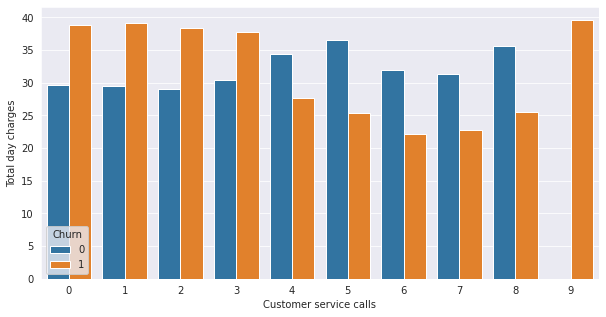

In [ ]:
# How does Total day minutes spoken relate to the Churn rate
plt.figure(figsize=(10,5))
sns.barplot(data = df, x = 'Customer service calls', y = 'Total day charge', hue = 'Churn', ci = False)
plt.xlabel('Customer service calls', fontsize = 10)
plt.ylabel('Total day charges', fontsize = 10)
plt.show()

We can see that if customer service calls are made more than 7 times, then the service is bound to be cancelled. This also comes with high charges imposed on the user.

At the same time we can see that many users leave the service over 1 to 3 calls made to the customer service when are charged more. Analysis of the total day charge to the minutes spoken over churn rate could give us a better understanding of the same.

In [ ]:
# Creating Spreadsheet-style pivot table
df.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls'],
               ['Area code'], aggfunc='mean')

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.496420,99.788783,99.039379
415,100.576435,100.503927,100.398187
510,100.097619,99.671429,100.601190


In [ ]:
# Creating Spreadsheet-style pivot table
df.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls'],
               ['Churn'], aggfunc='mean')

,Total day calls,Total eve calls,Total night calls
Churn,,,
0,100.283158,100.038596,100.058246
1,101.335404,100.561077,100.399586


In [ ]:
# Creating Spreadsheet-style pivot table
df.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls'],
               ['International plan'], aggfunc='mean')

,Total day calls,Total eve calls,Total night calls
International plan,,,
0,100.410963,100.074419,100.027907
1,100.665635,100.486068,100.851393


In [ ]:
df["Total Calls"] = df["Total day calls"]+df["Total eve calls"]+df["Total night calls"]+df["Total intl calls"]

In [ ]:
df[:10]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total Calls
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359
5,AL,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0,323
6,MA,121,510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0,321
7,MO,147,415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0,275
8,LA,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0,271
9,WV,141,415,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0,297


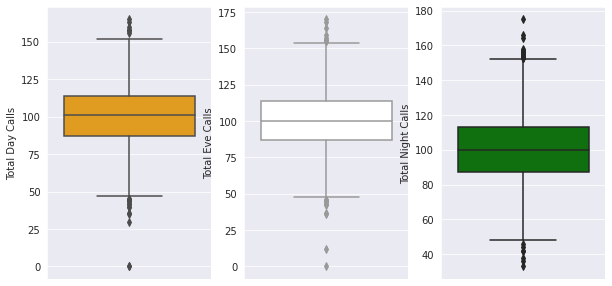

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,3,1)
sns.boxplot(data=df, y = 'Total day calls', color = 'orange')
plt.ylabel('Total Day Calls', fontsize = 10)

plt.subplot(1,3,2)
sns.boxplot(data =df, y = 'Total eve calls', color = 'white')
plt.ylabel('Total Eve Calls', fontsize = 10)

plt.subplot(1,3,3)
sns.boxplot(data=df, y = 'Total night calls', color = 'green')
plt.ylabel('Total Night Calls', fontsize = 10)

plt.show()

We can see that more calls are made in the morning with respect to the evening and night when it is the lowest

In [ ]:
# Create list of Total day minutes, Total eve minutes, Total night minutes
columns_to_show = ['Total day minutes', 'Total eve minutes', 'Total night minutes']

In [ ]:
# By using groupby method we groping churn column with Columns in column_to_show and also describe it
df.groupby(['Churn'])[columns_to_show].describe(percentiles=[])

Total day minutes                         ... Total night minutes               
                  count        mean        std  ...                 min     50%    max
Churn                                           ...                                   
0                2850.0  175.175754  50.181655  ...                23.2  200.25  395.0
1                 483.0  206.914079  68.997792  ...                47.4  204.80  354.9

[2 rows x 18 columns]

In [ ]:
df.groupby(['Churn'])[columns_to_show].agg([np.mean,np.std])  # Here we grouping and calculating mean and std using numpy library

Total day minutes             ... Total night minutes           
                   mean        std  ...                mean        std
Churn                               ...                               
0            175.175754  50.181655  ...          200.133193  51.105032
1            206.914079  68.997792  ...          205.231677  47.132825

[2 rows x 6 columns]

In [ ]:
df.groupby(['International plan'])[columns_to_show].agg([np.max,np.min,np.mean])  # Here we grouping and calculating mean and std using numpy library

Total day minutes        ... Total night minutes            
                                amax  amin  ...                amin        mean
International plan                          ...                                
0                              350.8   0.0  ...                23.2  201.350831
1                              346.8  12.5  ...                72.4  196.410217

[2 rows x 9 columns]

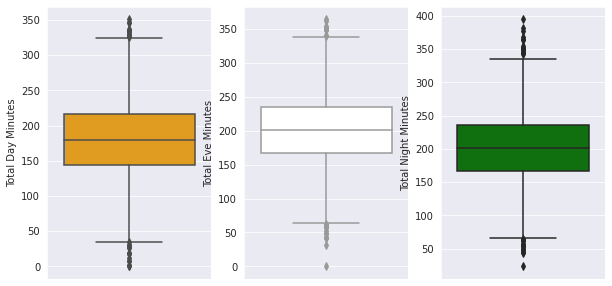

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,3,1)
sns.boxplot(data=df, y = 'Total day minutes', color = 'orange')
plt.ylabel('Total Day Minutes', fontsize = 10)

plt.subplot(1,3,2)
sns.boxplot(data = df, y = 'Total eve minutes', color = 'white')
plt.ylabel('Total Eve Minutes', fontsize = 10)

plt.subplot(1,3,3)
sns.boxplot(data=df, y = 'Total night minutes', color = 'green')
plt.ylabel('Total Night Minutes', fontsize = 10)

plt.show()

Despite having more calls made during the day, we can see that users do not spend longer time on the calls in the morning.
Users tend to talk for longer time in the afternoon than other times.

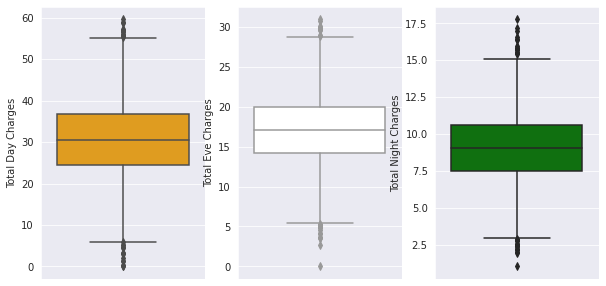

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,3,1)
sns.boxplot(data=df, y = 'Total day charge', color = 'orange')
plt.ylabel('Total Day Charges', fontsize = 10)

plt.subplot(1,3,2)
sns.boxplot(data =df, y = 'Total eve charge', color = 'white')
plt.ylabel('Total Eve Charges', fontsize = 10)

plt.subplot(1,3,3)
sns.boxplot(data=df, y = 'Total night charge', color = 'green')
plt.ylabel('Total Night Charges', fontsize = 10)

plt.show()

The charges are maximum in the evening time and lowest in the night time.
These plots are in conjunction with the minutes spoken.

In [ ]:
dftotal = pd.DataFrame(df['Churn'])

In [ ]:
#Creating three columns for total minutes, total calls and total charges
dftotal['Total minutes'] = df['Total day minutes'] +df['Total eve minutes'] + df['Total night minutes']
dftotal['Total calls'] = df['Total day calls'] + df['Total eve calls'] + df['Total night calls']
dftotal['Total charges'] = df['Total day charge'] + df['Total eve charge'] + df['Total night charge']

In [ ]:
dftotal.head()

,Churn,Total minutes,Total calls,Total charges
0,0,707.2,300,72.86
1,0,611.5,329,55.54
2,0,527.2,328,59.00
3,0,558.2,248,65.02
4,0,501.9,356,49.36


Text(0, 0.5, 'Total Charges')

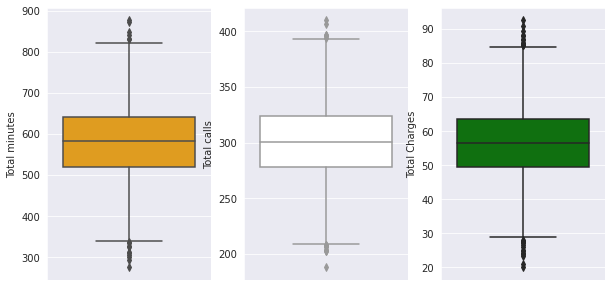

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.boxplot(data = dftotal, y = 'Total minutes', color = 'orange')
plt.ylabel('Total minutes', fontsize = 10)

plt.subplot(1,3,2)
sns.boxplot(data = dftotal, y = 'Total calls', color = 'white')
plt.ylabel('Total calls', fontsize = 10)

plt.subplot(1,3,3)
sns.boxplot(data = dftotal, y = 'Total charges', color = 'green')
plt.ylabel('Total Charges', fontsize = 10)

<Figure size 720x360 with 0 Axes>

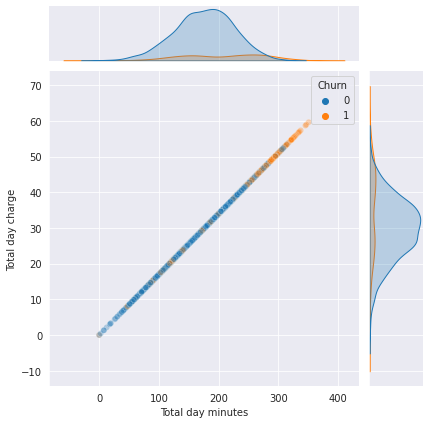

In [ ]:
plt.figure(figsize = (10,5))
sns.jointplot(data = df, x = 'Total day minutes', y = 'Total day charge',
                hue = 'Churn', alpha = 0.3)
plt.xlabel('Total Day Minutes', fontsize = 10)
plt.ylabel('Total Day Charges', fontsize = 10)
plt.show()

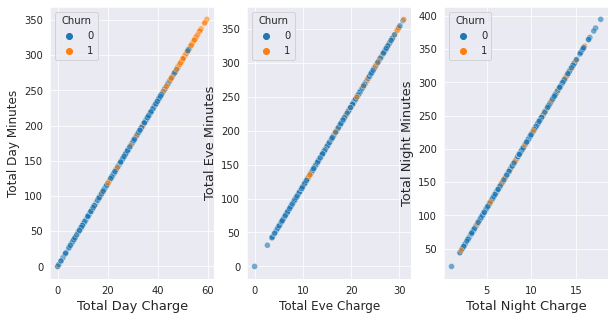

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,3,1)
sns.scatterplot(data = df, x = 'Total day charge', y = 'Total day minutes',
                hue = 'Churn', alpha = 0.6)
plt.xlabel('Total Day Charge', fontsize = 13)
plt.ylabel('Total Day Minutes', fontsize = 12)

plt.subplot(1,3,2)
sns.scatterplot(data = df, x = 'Total eve charge', y = 'Total eve minutes',
                hue = 'Churn', alpha = 0.6)
plt.xlabel('Total Eve Charge', fontsize = 12)
plt.ylabel('Total Eve Minutes', fontsize = 13)

plt.subplot(1,3,3)
sns.scatterplot(data = df, x = 'Total night charge', y = 'Total night minutes',
                hue = 'Churn', alpha = 0.6)
plt.xlabel('Total Night Charge', fontsize = 13)
plt.ylabel('Total Night Minutes', fontsize = 13)

plt.show()

A linear relationship can be observed between the two Variables.

Visible Churn can be seen with higher charges imposed when spoken for longer times.

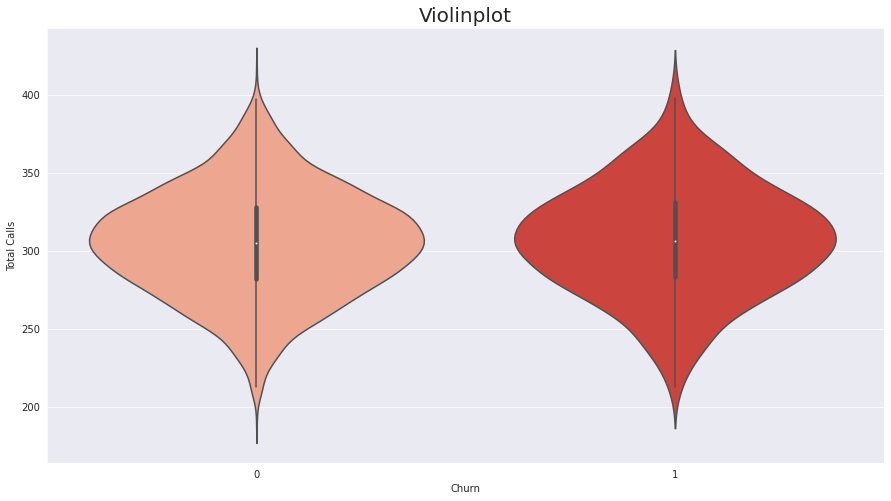

In [ ]:
#Relationship between Total day calls and churn using violinplot
plt.rcParams["figure.figsize"] = (15,8)
sns.violinplot(x=df["Churn"],y=df["Total Calls"],palette = "Reds")
plt.title("Violinplot",fontsize=20)
plt.show()

Histogram for Numeric Variables


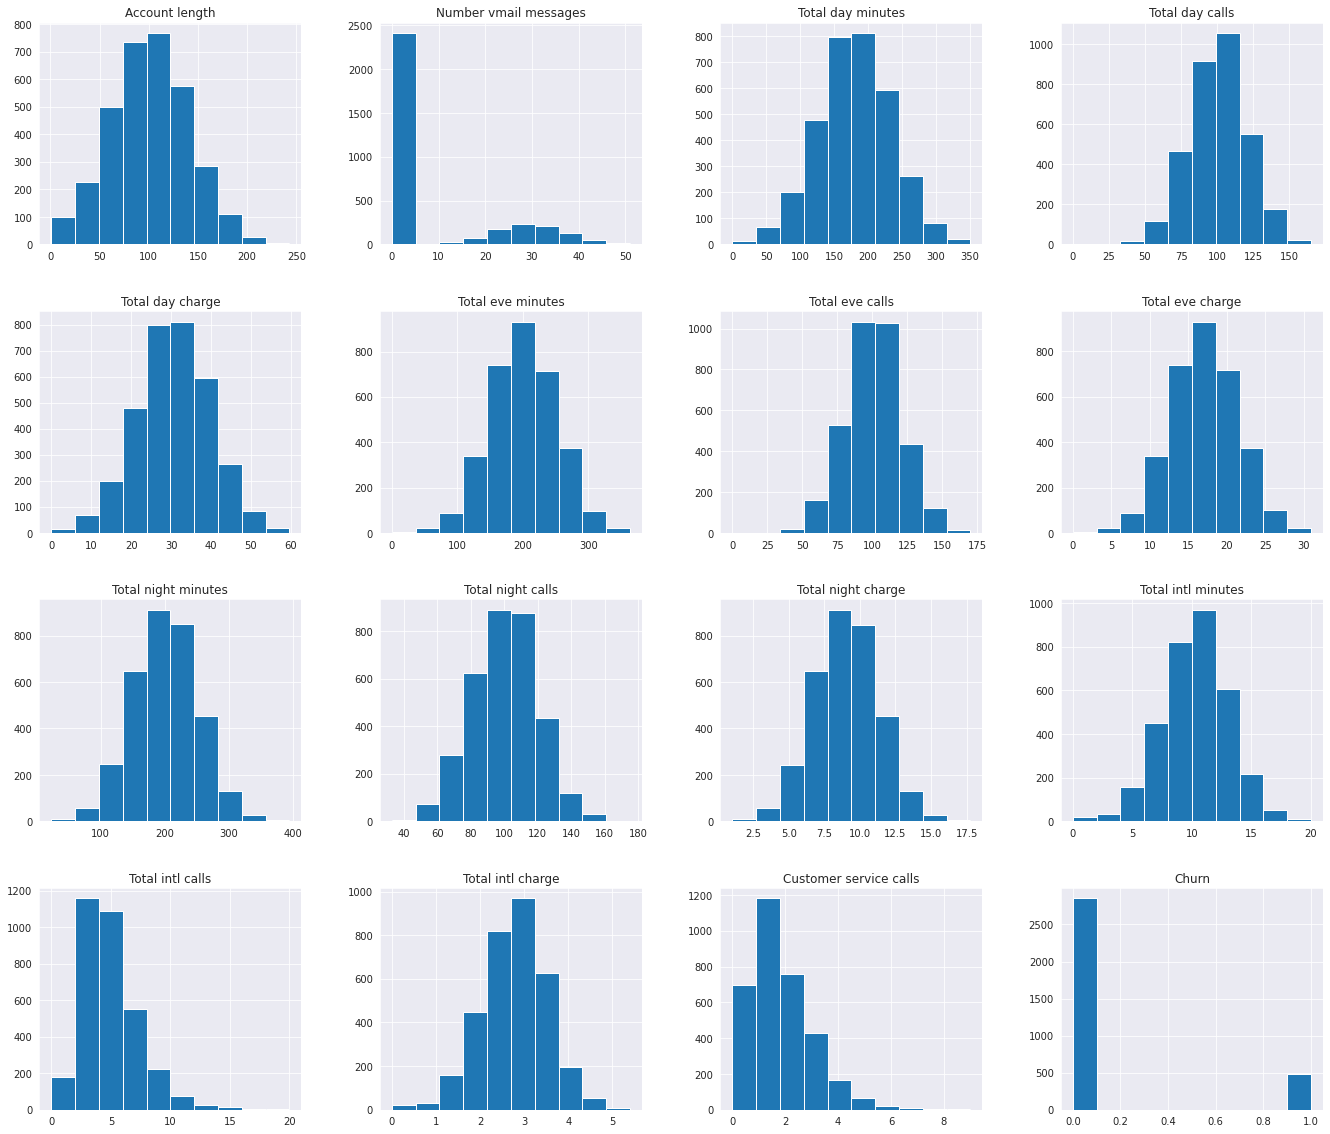

In [ ]:
print ("Histogram for Numeric Variables")
plots = numeric_df.hist(figsize=(23,20))

###Updating Pandas_profiling library 

In [ ]:
#Updating Pandas_profiling library 
#Credit goes to: https://colab.research.google.com/github/pandas-profiling/pandas-profiling/blob/master/examples/tutorials/modify_report_structure.ipynb#scrollTo=2LUglmchJc1J

import sys

!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

     |████████████████████████████████| 256kB 5.2MB/s 
     |████████████████████████████████| 10.1MB 10.0MB/s 
     |████████████████████████████████| 3.1MB 33.0MB/s 
     |████████████████████████████████| 81kB 6.1MB/s 
     |████████████████████████████████| 61kB 5.9MB/s 
     |████████████████████████████████| 112kB 24.1MB/s 
     |████████████████████████████████| 645kB 39.0MB/s 
     |████████████████████████████████| 1.1MB 39.2MB/s 
     |████████████████████████████████| 122kB 45.0MB/s 
     |████████████████████████████████| 296kB 43.8MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27099 sha256=2f22628bb335daf8467083cb7ebc6409e9d3c40d59605cca4598b7ffae21413f
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107437 sha256=5d8b03f8e7d25472a636fc952a0ddc4c9cd41a0567d6f681fa0083927576fd10
  Stored in directory: /root/.cac

###After loading the dataset we just need to run the following commands to generate and download the EDA report.

In [ ]:
#To Create report of our Analysis we use pandas_profiling library
from pandas_profiling import ProfileReport

# Generate the profile report
custromer_report = ProfileReport(df)
print(repr(custromer_report.report)) # repr() returns a printable representational string of the given object

Summarize dataset:   0%|          | 0/33 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Root


In [ ]:
print(custromer_report.report.content)

{'body': Container(name=Root), 'footer': HTML, 'name': 'Root'}


In [ ]:
custromer_report.to_notebook_iframe()

# Conclusions:

1. Based on our observation we can see that most people who leave the service are the ones who use the service in the day/morning.
2. It can also be observed that most people who use the service in the morning speak for shorter amounts of time but make more calls.
3. International plan users are more consistent with their churn w.r.t the ones who do not have the service.

**We can definitely suggest to prevent churn by:**
1. Upgrading network to improve services for long duration users.
2. Updating Pricing Strategies.
3. Updating and Optimizing Internationall Call Rates.
4. Implmenting a better network infrastructure in Maryland and Texas Areas where there is more Churn Rate.
5. Upgrading their services when in emegency only in evening period as low network traffic.
6. Introducing plans which minimize costs for more number of calls can be used.
7. Decreasing the prices as the talk-time increases can be an effective way to reduce the churn.
8. Improvement in the customer service can be done to reduce the number of calls which cause the churn.
9. Need to Upgrade or make smarter use of technologies like VoLTE to improve Voice Quality.
10. Cracking sound or noise during a call